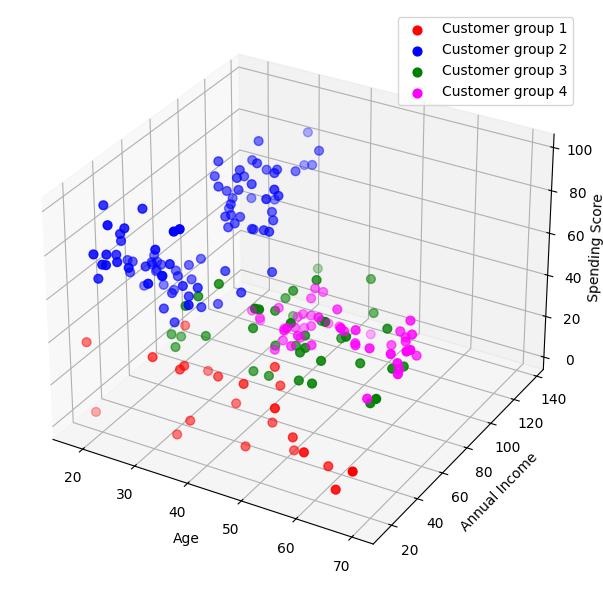

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the mall customers dataset from a CSV file into a Pandas DataFrame 
df = pd.read_csv("Mall_Customers.csv")

# # Get basic information about data
# print(df.info())
# print(df.columns)

# Prepare features (X)
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Scale features using StandardScaler (returns a NumPy array)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans with 4 clusters and fit the model on the scaled data
model = KMeans(n_clusters=4)
model.fit(X_scaled)

# Add the cluster labels assigned by KMeans as a new "Group" column in the DataFrame
df["Group"] = model.labels_

# Plot to visualize the Groups in a 3D coordinate system
from mpl_toolkits.mplot3d import Axes3D

colors = {0:"red", 1:"blue", 2:"green", 3:"magenta"}

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
for i in range(0,4):
    x = df.loc[df["Group"] == i]["Age"].values
    y = df.loc[df["Group"] == i]["Annual Income (k$)"].values
    z = df.loc[df["Group"] == i]["Spending Score (1-100)"].values
    ax.scatter(x, y, z, marker="o", s=40, color=colors[i], label='Customer group ' + str(i+1))
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score", labelpad=0.5)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()





